DEEP NEURAL NETWORK 

WE CANT ALWAYS FIT OUR MODEL WITH LINEAR BOUNDARIES, FOR GIVEN DATA. 
We combine linear models to create non linear model. 

activation functions actually make the model smooth on curves

In [1]:
import torch 
import torch.nn as nn
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets

In [2]:
n_pts = 500
x, y = datasets.make_circles(n_samples= n_pts, random_state= 123, noise= 0.1, factor=0.2)
print(x,y)
x_data= torch.Tensor(x)
y_data= torch.Tensor(y.reshape(500,1))

[[ 6.98553633e-01 -3.78289607e-01]
 [-2.48422424e-01  1.91071221e-01]
 [-1.78759035e-01  2.53697475e-01]
 [-7.30467124e-03 -2.59266690e-01]
 [-1.59844140e-01  2.66915921e-01]
 [-8.01071690e-01 -1.08656135e-01]
 [ 1.00816914e+00  2.07309295e-01]
 [ 4.39780516e-02 -2.80236072e-01]
 [-8.34853704e-02 -1.38114367e-01]
 [-9.88928208e-01 -9.26102014e-02]
 [ 8.83638650e-02  1.96647051e-01]
 [ 2.22010570e-01  5.62848283e-02]
 [ 7.74176833e-01  8.22258534e-01]
 [ 6.42098042e-02  1.77475658e-01]
 [ 3.29904597e-01 -6.76348560e-02]
 [ 9.37162087e-01  2.05987221e-01]
 [-2.00792169e-01  5.35547075e-02]
 [ 5.32997317e-02 -2.82138380e-01]
 [-9.93783900e-02 -3.28183801e-01]
 [ 1.02684872e+00 -2.66939738e-01]
 [-8.69193490e-01  6.85448273e-01]
 [-6.70339467e-03  2.44518907e-01]
 [ 2.31538284e-02 -8.12416827e-01]
 [ 1.03822075e-01  1.19298417e-01]
 [-9.57389366e-01 -3.49206448e-01]
 [-7.98982279e-02  2.30581375e-01]
 [ 1.31496662e-01  4.30585961e-02]
 [ 3.68169092e-02  9.51356467e-01]
 [ 6.71357733e-01 -8

In [3]:
def scatter_plot():
  plt.scatter(x[y==0,0], x[y==0,1])
  plt.scatter(x[y==1,0], x[y==1,1])

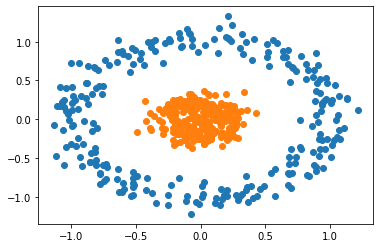

In [4]:
scatter_plot()

In [5]:
class Model(nn.Module):
  def __init__(self, input, h1, output):
    super().__init__()
    self.linear1= nn.Linear(input,h1)
    self.linear2= nn.Linear(h1,output)

  def forward(self,x):
    x = torch.sigmoid(self.linear1(x))
    x = torch.sigmoid(self.linear2(x))
    return x

  def predict(self,x):
    pred = self.forward(x)
    if pred>=0.5:
      return 1
    else:
      return 0 

In [23]:
torch.manual_seed(2)
model = Model(2,4,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [24]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [25]:
epochs = 1000
losses=[]

for i in range(epochs):
  y_pred= model.forward(x_data)
  loss= criterion(y_pred,y_data)
  print(i,'epochs','loss',loss)
  losses.append(loss.item())
  optimizer.zero_grad
  loss.backward()
  optimizer.step()



0 epochs loss tensor(0.7149, grad_fn=<BinaryCrossEntropyBackward0>)
1 epochs loss tensor(0.7148, grad_fn=<BinaryCrossEntropyBackward0>)
2 epochs loss tensor(0.7148, grad_fn=<BinaryCrossEntropyBackward0>)
3 epochs loss tensor(0.7148, grad_fn=<BinaryCrossEntropyBackward0>)
4 epochs loss tensor(0.7147, grad_fn=<BinaryCrossEntropyBackward0>)
5 epochs loss tensor(0.7147, grad_fn=<BinaryCrossEntropyBackward0>)
6 epochs loss tensor(0.7147, grad_fn=<BinaryCrossEntropyBackward0>)
7 epochs loss tensor(0.7146, grad_fn=<BinaryCrossEntropyBackward0>)
8 epochs loss tensor(0.7146, grad_fn=<BinaryCrossEntropyBackward0>)
9 epochs loss tensor(0.7146, grad_fn=<BinaryCrossEntropyBackward0>)
10 epochs loss tensor(0.7145, grad_fn=<BinaryCrossEntropyBackward0>)
11 epochs loss tensor(0.7145, grad_fn=<BinaryCrossEntropyBackward0>)
12 epochs loss tensor(0.7145, grad_fn=<BinaryCrossEntropyBackward0>)
13 epochs loss tensor(0.7144, grad_fn=<BinaryCrossEntropyBackward0>)
14 epochs loss tensor(0.7144, grad_fn=<Binar

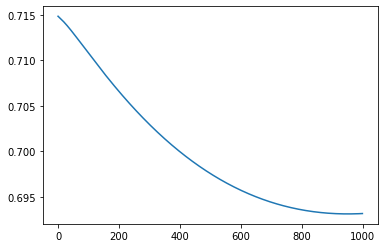

In [26]:
plt.plot(range(epochs), losses)